In [12]:
# %% [markdown]
# # Data Science Project: Titanic Survival Analysis
# **Folder**: `Computer_Science_Mathematics/Data_Science/Notebooks/`  
# **Dataset**: `../Data/titanic.csv`

In [13]:
# %% [markdown]
# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [14]:
# %% [markdown]
# ## 2. Load Data
df = pd.read_csv('../Data/train.csv')
print("Data shape:", df.shape)
df.head()

Data shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# %% [markdown]
# ## 3. Data Cleaning
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Nonos\AppData\Local\Temp\ipykernel_10572\4004166759.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Nonos\AppData\Local\Temp\ipykernel_10572\4004166759.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [16]:
# Drop irrelevant columns
df.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

C:\Users\Nonos\AppData\Local\Temp\ipykernel_10572\837852353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')


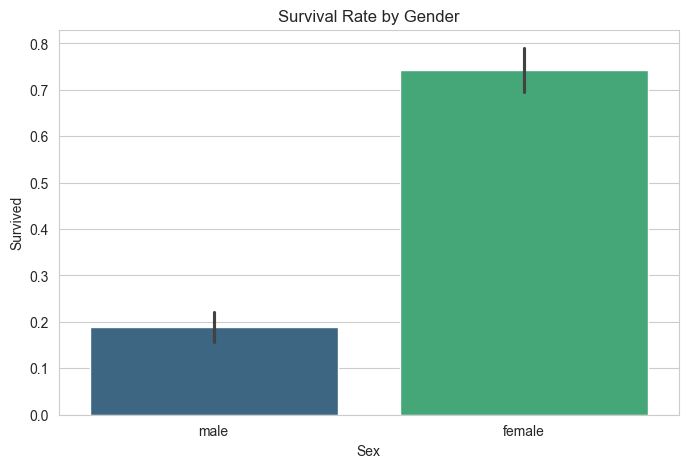

In [17]:
# %% [markdown]
# ## 4. Exploratory Data Analysis (EDA)
# %% [markdown]
# ### Survival Rate by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.savefig('../Outputs/Figures/survival_by_gender.png')  # Save to Outputs
plt.show()

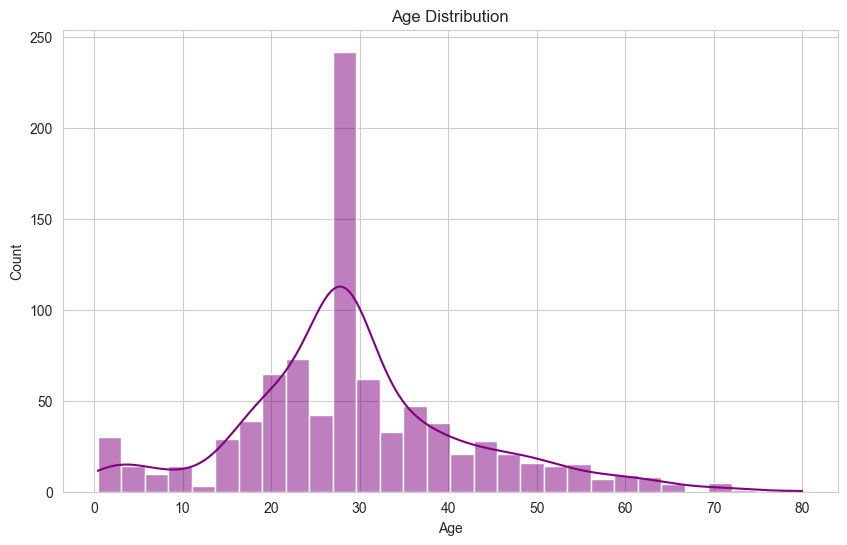

In [18]:
# %% [markdown]
# ### Age Distribution of Passengers
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution')
plt.savefig('../Outputs/Figures/age_distribution.png')
plt.show()

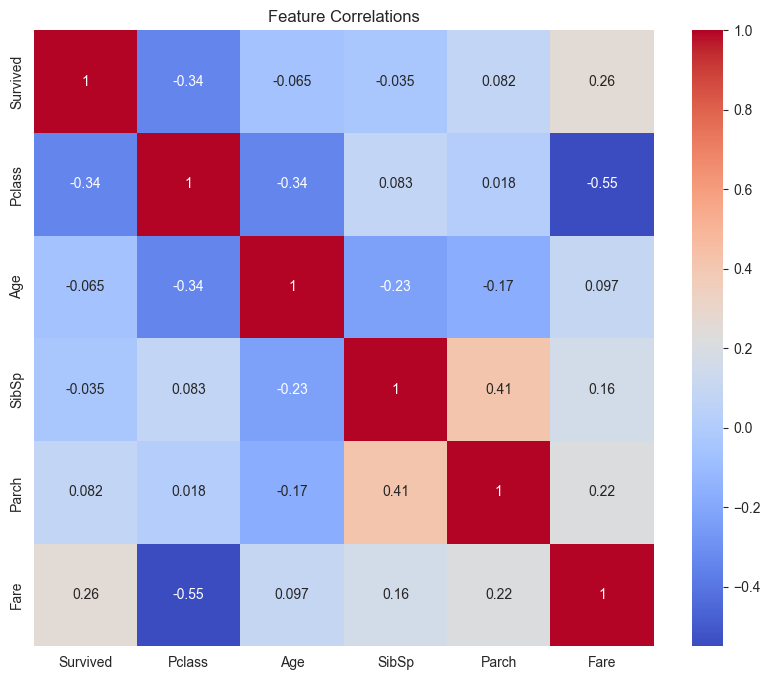

In [19]:
# %% [markdown]
# ### Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.savefig('../Outputs/Figures/correlation_heatmap.png')
plt.show()

In [20]:
# %% [markdown]
# ## 5. Feature Engineering
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [21]:
# Bin ages
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,18,35,50,100], labels=['Child','Young','Middle','Senior'])

In [ ]:
# %% [markdown]
# ## 6. Machine Learning Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Preprocess features
X = df.drop('Survived', axis=1)
y = df['Survived']

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['Sex', 'Embarked', 'AgeGroup']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# %% [markdown]
# ## 7. Model Training (Example: Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

In [ ]:
# %% [markdown]
# ## 8. Save Model
import joblib
joblib.dump(model, '../Outputs/Models/gender submission.csv')